In [899]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector, RFECV


In [900]:
main = pd.read_json('../results_cleaned/mdf2_all.json')
main = main.dropna(how='any',axis=0) 
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 50
Columns: 3953 entries, 0_ram to SWPc
dtypes: float64(3950), int64(1), object(2)
memory usage: 1.5+ MB


In [901]:
# mdf = main.loc[:, main.columns != ['tree_idx','test_number','SWPc']]
mdf_all = main.loc[:, ~main.columns.isin(['tree_idx','test_number','SWPc'])]
mdf_all = mdf_all.drop(['leaf_temp'], axis=1)
mdf_all.head(5)

,0_ram,1_ram,2_ram,3_ram,4_ram,5_ram,6_ram,7_ram,8_ram,9_ram,...,2149_VNIR,2150_VNIR,Ta,cwsi,NDVI median,GNDVI median,OSAVI median,LCI median,NDRE median,SWP
0,1465.578891,1423.852828,1277.466335,1186.746508,1072.026681,716.288375,489.854276,359.282060,349.134772,230.609769,...,6.404633,6.405933,34.92,0.217221,0.626791,0.519736,0.297444,0.191403,0.133871,12.17
1,1106.738141,1219.524354,1071.310567,887.096780,838.549660,512.669206,119.788752,34.723332,-97.670851,-129.722427,...,6.147267,6.141067,34.92,0.254403,0.585834,0.494972,0.278236,0.158030,0.111486,16.67
2,1317.266807,1282.726662,1285.519849,1038.313037,891.772892,621.232746,172.359267,175.720685,52.812680,-57.432992,...,9.300467,9.297667,34.92,0.252446,0.642343,0.532352,0.303992,0.199991,0.139343,13.50
3,1234.479307,1298.462786,1203.112931,1068.763077,903.079889,504.396701,291.380179,243.135091,110.249118,-24.861483,...,7.168533,7.167700,34.92,0.101761,0.674664,0.553384,0.317935,0.205452,0.141144,16.33
4,2403.580414,2425.973567,2274.033387,2146.426541,1824.819694,1429.212847,955.939334,808.680871,750.888548,554.140217,...,5.496400,5.471267,34.92,0.142857,0.649644,0.535790,0.285607,0.200687,0.139015,14.00


In [902]:
mdf_init = mdf_all.iloc[:,-8:]
mdf_init.head(5)

,Ta,cwsi,NDVI median,GNDVI median,OSAVI median,LCI median,NDRE median,SWP
0,34.92,0.217221,0.626791,0.519736,0.297444,0.191403,0.133871,12.17
1,34.92,0.254403,0.585834,0.494972,0.278236,0.158030,0.111486,16.67
2,34.92,0.252446,0.642343,0.532352,0.303992,0.199991,0.139343,13.50
3,34.92,0.101761,0.674664,0.553384,0.317935,0.205452,0.141144,16.33
4,34.92,0.142857,0.649644,0.535790,0.285607,0.200687,0.139015,14.00


In [903]:
def mdf_maker(phrase,df):
    mask = df.columns.str.contains(phrase)
    cols_to_keep = df.columns[mask].tolist()
    cols_to_keep.append("SWP")
    # df = df.drop(columns=cols_to_drop)
    df = df[cols_to_keep]
    return df

mdf_VNIR = mdf_maker("VNIR",mdf_all)
mdf_VNIR.head(5)


,0_VNIR,1_VNIR,2_VNIR,3_VNIR,4_VNIR,5_VNIR,6_VNIR,7_VNIR,8_VNIR,9_VNIR,...,2142_VNIR,2143_VNIR,2144_VNIR,2145_VNIR,2146_VNIR,2147_VNIR,2148_VNIR,2149_VNIR,2150_VNIR,SWP
0,0.000833,0.015167,0.032067,0.102233,0.251967,0.445967,0.679833,0.914533,1.164433,1.435667,...,6.457467,6.430633,6.406700,6.395767,6.400200,6.404700,6.404633,6.404633,6.405933,12.17
1,0.000000,0.000000,0.000000,0.036400,0.158100,0.342700,0.586767,0.844967,1.118467,1.404967,...,6.205967,6.206700,6.210933,6.203600,6.181833,6.163467,6.154600,6.147267,6.141067,16.67
2,0.000000,0.000000,0.018833,0.141533,0.336333,0.587633,0.896133,1.241533,1.616433,2.016000,...,9.325267,9.322333,9.319567,9.318967,9.321400,9.319767,9.309967,9.300467,9.297667,13.50
3,0.000000,0.000000,0.013567,0.114033,0.283600,0.488133,0.719833,0.968400,1.243500,1.551267,...,7.249800,7.230800,7.210033,7.191967,7.176133,7.166600,7.166800,7.168533,7.167700,16.33
4,0.000000,0.019200,0.055733,0.139300,0.272900,0.452800,0.681367,0.922600,1.177233,1.443600,...,5.580100,5.578433,5.579300,5.575700,5.567933,5.552433,5.525200,5.496400,5.471267,14.00


In [904]:
mdf_ram = mdf_maker("ram",mdf_all)
mdf_ram.head(5)

,0_ram,1_ram,2_ram,3_ram,4_ram,5_ram,6_ram,7_ram,8_ram,9_ram,...,1781_ram,1782_ram,1783_ram,1784_ram,1785_ram,1786_ram,1787_ram,1788_ram,1789_ram,SWP
0,1465.578891,1423.852828,1277.466335,1186.746508,1072.026681,716.288375,489.854276,359.282060,349.134772,230.609769,...,9.014989,-7.916984,19.325900,16.742627,6.492687,13.540037,23.937678,-4.331222,9.243014,12.17
1,1106.738141,1219.524354,1071.310567,887.096780,838.549660,512.669206,119.788752,34.723332,-97.670851,-129.722427,...,5.432122,12.151812,44.884696,7.950912,22.695160,18.106075,46.516989,-30.072096,22.370862,16.67
2,1317.266807,1282.726662,1285.519849,1038.313037,891.772892,621.232746,172.359267,175.720685,52.812680,-57.432992,...,12.390162,14.001761,53.949223,22.563352,31.854914,10.146475,60.113054,-36.920368,7.009538,13.50
3,1234.479307,1298.462786,1203.112931,1068.763077,903.079889,504.396701,291.380179,243.135091,110.249118,-24.861483,...,27.867001,24.751114,45.968560,14.852672,32.403451,23.312721,40.221992,-34.868738,10.691019,16.33
4,2403.580414,2425.973567,2274.033387,2146.426541,1824.819694,1429.212847,955.939334,808.680871,750.888548,554.140217,...,26.446472,43.867582,61.288691,8.709800,37.128775,17.214418,44.966727,-34.947631,26.454491,14.00


****** Choose the mdf ******



In [930]:
# mdf = mdf_init
mdf = mdf_ram

In [931]:
corrs = mdf.corr()
print(corrs['SWP'].sort_values(ascending=False),'\n')

SWP         1.000000
1740_ram    0.879866
1762_ram    0.879549
1535_ram    0.870239
1089_ram    0.866340
              ...   
1704_ram   -0.847123
641_ram    -0.854052
1208_ram   -0.867905
1413_ram   -0.874330
1689_ram   -0.877927
Name: SWP, Length: 1791, dtype: float64 



<AxesSubplot:>

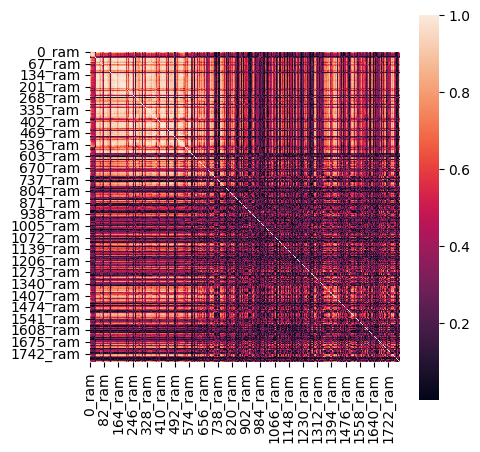

In [932]:
f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(abs(corrs),square=True,vmax=1)

<AxesSubplot:>

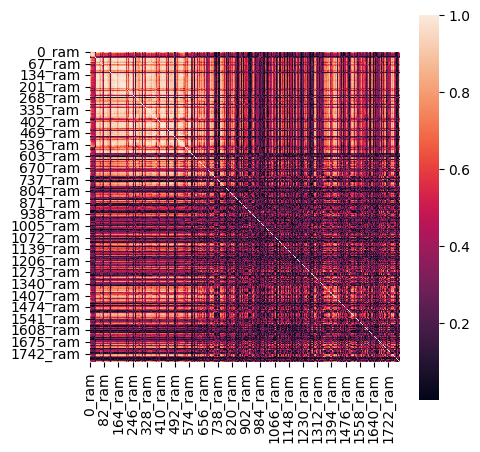

In [933]:
corrs = mdf.corr()
f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(abs(corrs),square=True,vmax=1)

In [935]:
# main['SWPc'].unique()
# correct_label= np.array(['WL-1', 'WL-2', 'WL-3'], dtype=object)
# label_quality = LabelEncoder()
# main['SWPc'] = label_quality.fit_transform(main['SWPc'])
# main['SWPc'].isnull().sum()
# print('SWPc \n',main['SWPc'].value_counts())
# sns.countplot(x=main['SWPc'])

0

In [936]:
bins = (0,18,40)
label_quality = LabelEncoder()
# group_names = ['WL1','WL2']
main['SWPc2'] = pd.cut(main['SWP'], bins=bins )
main['SWPc2'] = label_quality.fit_transform(main['SWPc2'])
main['SWPc2'].isnull().sum()

0

In [937]:
main.head(5)

,0_ram,1_ram,2_ram,3_ram,4_ram,5_ram,6_ram,7_ram,8_ram,9_ram,...,Ta,cwsi,NDVI median,GNDVI median,OSAVI median,LCI median,NDRE median,SWP,SWPc,SWPc2
0,1465.578891,1423.852828,1277.466335,1186.746508,1072.026681,716.288375,489.854276,359.282060,349.134772,230.609769,...,34.92,0.217221,0.626791,0.519736,0.297444,0.191403,0.133871,12.17,0,0
1,1106.738141,1219.524354,1071.310567,887.096780,838.549660,512.669206,119.788752,34.723332,-97.670851,-129.722427,...,34.92,0.254403,0.585834,0.494972,0.278236,0.158030,0.111486,16.67,0,0
2,1317.266807,1282.726662,1285.519849,1038.313037,891.772892,621.232746,172.359267,175.720685,52.812680,-57.432992,...,34.92,0.252446,0.642343,0.532352,0.303992,0.199991,0.139343,13.50,0,0
3,1234.479307,1298.462786,1203.112931,1068.763077,903.079889,504.396701,291.380179,243.135091,110.249118,-24.861483,...,34.92,0.101761,0.674664,0.553384,0.317935,0.205452,0.141144,16.33,0,0
4,2403.580414,2425.973567,2274.033387,2146.426541,1824.819694,1429.212847,955.939334,808.680871,750.888548,554.140217,...,34.92,0.142857,0.649644,0.535790,0.285607,0.200687,0.139015,14.00,0,0



 SWPc2 
 2    20
0    19
1    11
Name: SWPc2, dtype: int64


<AxesSubplot:xlabel='SWPc2', ylabel='count'>

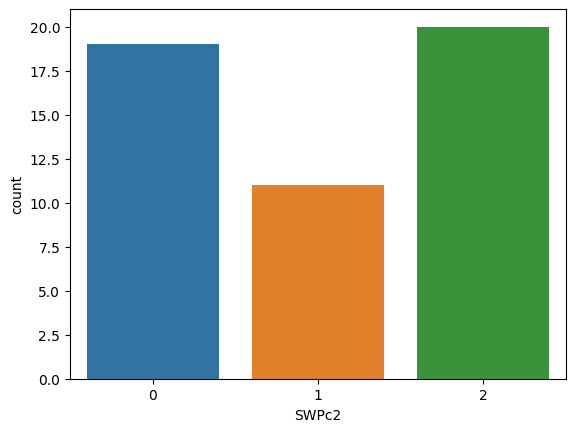

In [939]:
print('\n SWPc2 \n',main['SWPc2'].value_counts())
sns.countplot(x=main['SWPc2'])

In [940]:
X = mdf.drop('SWP',axis=1)
y = main['SWPc2']
# y = main['SWP']


In [941]:
# pca = PCA(n_components=5) 
# X = pca.fit(X).transform(X)

In [942]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, \
                                                    random_state = 10)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
cv=5


In [943]:
# rfc = RandomForestClassifier()

# num_features_to_select = 4
# sfs = SequentialFeatureSelector(rfc, n_features_to_select=num_features_to_select, direction='forward')
# sfs.fit(X_train, y_train)
# X_train_sfs = sfs.transform(X_train)
# X_test_sfs = sfs.transform(X_test)

# rfecv = RFECV(estimator=rfc,step=1,cv=cv,scoring="accuracy",min_features_to_select=num_features_to_select,n_jobs=2,)
# rfecv.fit(X, y)

# feature_names = mdf.columns[:-1].to_numpy() 
# print(feature_names)
# print(
#     "Features selected by recursive feature elimination: "
#     f"{feature_names[rfecv.get_support()]}")

# Define the parameter grid

# rfc = RandomForestClassifier(n_estimators=100, max_depth=)
# rfc.fit(X_train_sfs, y_train)
# pred_rfc = rfc.predict(X_test_sfs)
# feature_names = mdf.columns[:-1].to_numpy() 
# print(feature_names)
# print(
#     "Features selected by forward sequential selection: "
#     f"{feature_names[sfs.get_support()]}")



In [944]:
# param_grid = {
#     'n_estimators': [10, 15, 25, 50, 100],
#     'max_features': ['sqrt', 'log2'],
#     'max_depth' : [2,3,4,5],
#     'criterion' :['gini', 'entropy']
# }

# grid_search_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, 
#                           cv = cv, n_jobs = -1, verbose = 2)
# grid_search_rfc.fit(X_train, y_train)

# best_grid = grid_search_rfc.best_estimator_
# print(grid_search_rfc.best_params_)

rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print('Random Forest accuracy: ',accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

Random Forest accuracy:  0.8666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.67      1.00      0.80         4
           2       1.00      0.67      0.80         6

    accuracy                           0.87        15
   macro avg       0.89      0.89      0.87        15
weighted avg       0.91      0.87      0.87        15

[[5 0 0]
 [0 4 0]
 [0 2 4]]


In [945]:
# clf=SVR()
# clf.fit(X_train,y_train)
# pred_clf = clf.predict(X_test)
# print('SVM accuracy: ',clf.score(X_test, pred_clf))
# cross_val_score(clf,X,y,cv=5)


In [946]:
clf=SVC()
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)
print('SVM accuracy: ',accuracy_score(y_test, pred_clf))
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

SVM accuracy:  0.8666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.67      1.00      0.80         4
           2       1.00      0.67      0.80         6

    accuracy                           0.87        15
   macro avg       0.89      0.89      0.87        15
weighted avg       0.91      0.87      0.87        15

[[5 0 0]
 [0 4 0]
 [0 2 4]]


In [947]:
gnb= GaussianNB()
gnb.fit(X_train,y_train)
pred_gnb = gnb.predict(X_test)
print('DT accuracy: ',accuracy_score(y_test, pred_gnb))
print(classification_report(y_test, pred_gnb))
print(confusion_matrix(y_test, pred_gnb))

DT accuracy:  0.8
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      0.75      0.67         4
           2       0.80      0.67      0.73         6

    accuracy                           0.80        15
   macro avg       0.80      0.81      0.80        15
weighted avg       0.81      0.80      0.80        15

[[5 0 0]
 [0 3 1]
 [0 2 4]]


In [948]:
dt= tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred_dt = dt.predict(X_test)
print('DT accuracy: ',accuracy_score(y_test, pred_dt))
print(classification_report(y_test, pred_dt))
print(confusion_matrix(y_test, pred_dt))

DT accuracy:  0.8666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.67      1.00      0.80         4
           2       1.00      0.67      0.80         6

    accuracy                           0.87        15
   macro avg       0.89      0.89      0.87        15
weighted avg       0.91      0.87      0.87        15

[[5 0 0]
 [0 4 0]
 [0 2 4]]


In [949]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print('KNN accuracy: ',accuracy_score(y_test, pred_knn))
print(classification_report(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))

KNN accuracy:  0.8666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.67      1.00      0.80         4
           2       1.00      0.67      0.80         6

    accuracy                           0.87        15
   macro avg       0.89      0.89      0.87        15
weighted avg       0.91      0.87      0.87        15

[[5 0 0]
 [0 4 0]
 [0 2 4]]


In [950]:
mlpc= MLPClassifier(hidden_layer_sizes=(15,15),max_iter=2000)
mlpc.fit(X_train,y_train)
pred_mlpc = mlpc.predict(X_test)
print('Neural Network accuracy: ',accuracy_score(y_test, pred_mlpc))
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

Neural Network accuracy:  0.8666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.67      1.00      0.80         4
           2       1.00      0.67      0.80         6

    accuracy                           0.87        15
   macro avg       0.89      0.89      0.87        15
weighted avg       0.91      0.87      0.87        15

[[5 0 0]
 [0 4 0]
 [0 2 4]]


In [951]:
cval_rf = np.array(cross_val_score(rfc, X, y, cv=cv))
cval_svc = np.array(cross_val_score(clf, X, y, cv=cv))
cval_gnb = np.array(cross_val_score(gnb, X, y, cv=cv))
cval_dt = np.array(cross_val_score(dt, X, y, cv=cv))
cval_knn = np.array(cross_val_score(knn, X, y, cv=cv))
cval_nn = np.array(cross_val_score(mlpc, X, y, cv=cv))

In [952]:
model_stats = pd.DataFrame({
    'Model': ['RandomF', 'SVM', 'GaussianNB', 'DT', 'KNN', 'NN'],
    'CV Mean': [cval_rf.mean(), cval_svc.mean(), cval_gnb.mean(), cval_dt.mean(), cval_knn.mean(), cval_nn.mean()],
    'CV Std': [cval_rf.std(), cval_svc.std(), cval_gnb.std(), cval_dt.std(), cval_knn.std(), cval_nn.std()]
})

model_stats.set_index('Model', inplace=True)
model_stats = model_stats.round(2)
model_stats

,CV Mean,CV Std
Model,,
RandomF,0.86,0.23
SVM,0.74,0.12
GaussianNB,0.86,0.23
DT,0.70,0.25
KNN,0.84,0.22
NN,0.76,0.19


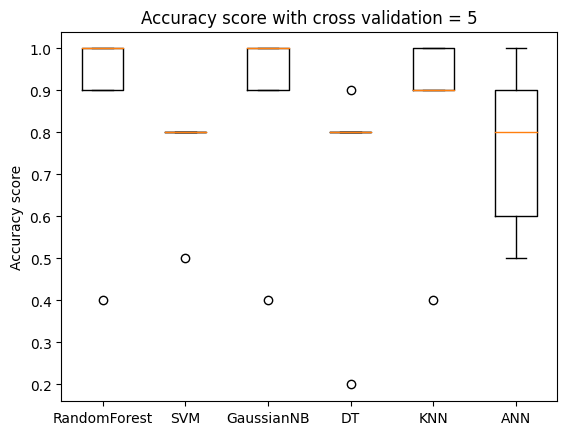

In [953]:
data = [cval_rf,cval_svc,cval_gnb,cval_dt,cval_knn,cval_nn]
plt.boxplot(data)
plt.xticks([1, 2, 3, 4, 5, 6],['RandomForest','SVM','GaussianNB','DT','KNN','ANN'])
plt.ylabel('Accuracy score')
plt.title('Accuracy score with cross validation = ' + str(cv))
plt.show()

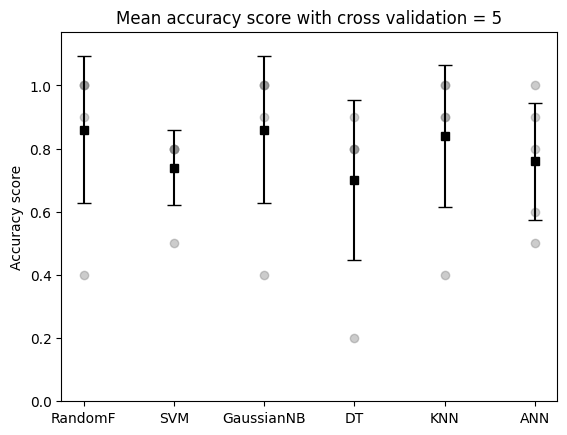

In [954]:
# Prepare the data
models = ['RandomF', 'SVM', 'GaussianNB', 'DT', 'KNN', 'ANN']
means = [cval_rf.mean(), cval_svc.mean(), cval_gnb.mean(), cval_dt.mean(), cval_knn.mean(), cval_nn.mean()]
stds = [cval_rf.std(), cval_svc.std(), cval_gnb.std(), cval_dt.std(), cval_knn.std(), cval_nn.std()]
all_values = [cval_rf, cval_svc, cval_gnb, cval_dt, cval_knn, cval_nn]

# Create index for each model
index = np.arange(len(models))

# Create scatter plot for individual scores
for i, values in enumerate(all_values):
    plt.scatter([i]*len(values), values, alpha=0.4, color='gray')

# Create scatter plot for mean scores with error bars
plt.errorbar(index, means, yerr=stds, fmt='s', color='k', capsize=5)

# Label the x-axis with model names
plt.xticks(index, models)

plt.ylabel('Accuracy score')
plt.title('Mean accuracy score with cross validation = ' + str(cv))
plt.ylim(bottom=0)
plt.ylim(None,1.17)
plt.show()

Optimized Hyperparameters
